In [18]:
#week1
#1. setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

df1 = pd.read_excel(r"C:\Users\Carl\Documents\Year3\CompBio\T1\Cell-Cycle-Set.xlsx", sheet_name="Sheet1")
# 'r' converts normal string to raw string

df1 = df1.dropna(how='any') #removing rows with NAN
df1 = df1.reset_index(drop=True) #resetting index after removing rows

Mean RNA concentration during the G1 phase of the cell cylce: 11.215627
Variance of RNA concentration during the G1 phase of the cell cylce: 2.160506
Mean Protein concentration during the G1 phase of the cell cylce: 25.351672
Variance of Protein concentration during the G1 phase of the cell cylce: 10.453574


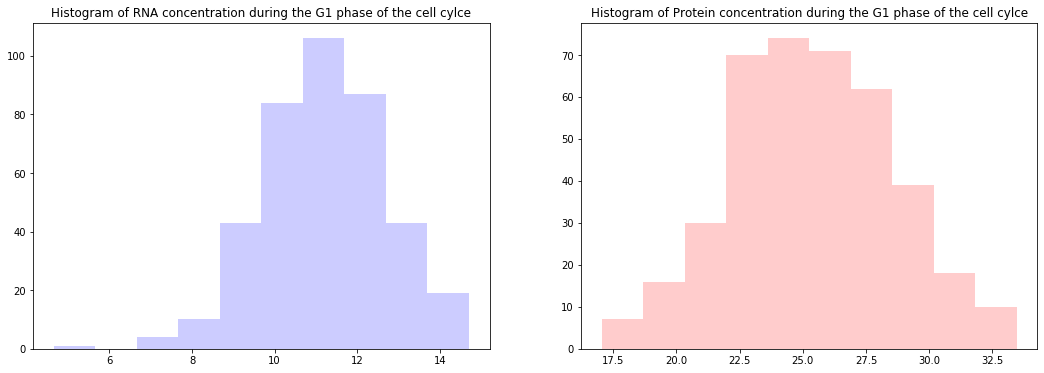

In [19]:
#2.1 Histograms of cell cycle G1 phase

# plotting
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax1[0].hist(df1['mean_RNA_G1'], color='b',alpha=0.2)
ax1[0].set_title("Histogram of RNA concentration during the G1 phase of the cell cylce", fontsize = 12)
ax1[1].hist(df1['mean_protein_G1'], color='r',alpha=0.2)
ax1[1].set_title("Histogram of Protein concentration during the G1 phase of the cell cylce", fontsize = 12)

print("Mean RNA concentration during the G1 phase of the cell cylce: %f" %df1['mean_RNA_G1'].mean())
print("Variance of RNA concentration during the G1 phase of the cell cylce: %f" %df1['mean_RNA_G1'].var())
print("Mean Protein concentration during the G1 phase of the cell cylce: %f" %df1['mean_protein_G1'].mean())
print("Variance of Protein concentration during the G1 phase of the cell cylce: %f" %df1['mean_protein_G1'].var())

#do you notice anything interesting regarding the mean/var???
#expected RNA concentration to be higher since these molecules encode the information about the protein. However,
#this is a growth phase, where protein generated in different ways are forced into the cell hence its mean is higher.
#also the same strands of RNA can bind to multiple ribosomes thus being used to form multiple proteins
#the variance of protein concentration is much higher than the concentration of RNA which suggests it is more
#unpredictable.This fits in with the theory that proteins are being forced into the cell from other generation methods

In [20]:
#2.2 correlation

df1.corr(method='pearson') #pearson- std correlation coefficient
#each cell indicates the correlation between the 2 variables corr = cov(x,y)/sig(x)sig(y)

#Does the change in time step have much effect on the relationship between RNA and Protein? 
#relationship is almost independent to a change in time step (cell cycle phase)
#on average, the number of proteins in the organism is roughly constant? the proteins form and die at the same rate? 

,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2
mean_RNA_G1,1.000000,0.991063,0.992023,0.522658,0.541428,0.544206
mean_RNA_S,0.991063,1.000000,0.986836,0.514705,0.536190,0.534322
mean_RNA_G2,0.992023,0.986836,1.000000,0.510364,0.529690,0.532565
mean_protein_G1,0.522658,0.514705,0.510364,1.000000,0.970289,0.977016
mean_protein_S,0.541428,0.536190,0.529690,0.970289,1.000000,0.975964
mean_protein_G2,0.544206,0.534322,0.532565,0.977016,0.975964,1.000000


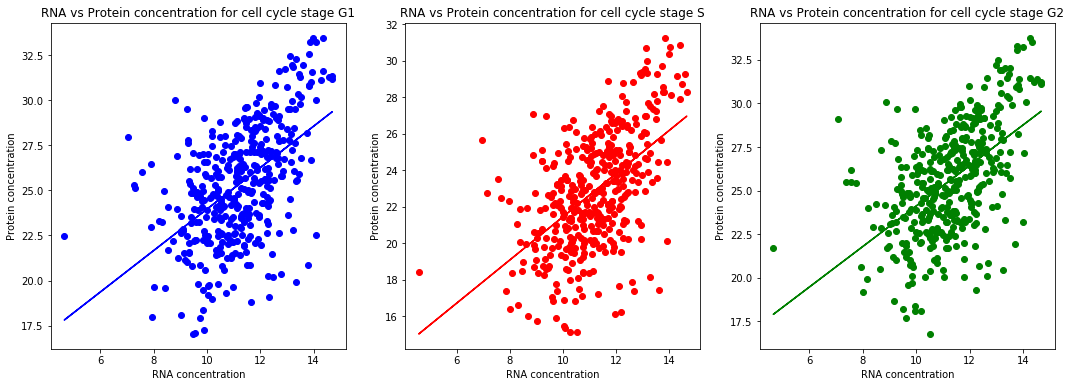

In [21]:
#2.3 scatter plot of RNA vs Protein for each stage of the cell cycle

fig2, ax2 = plt.subplots(figsize=(18,6),nrows=1, ncols=3)
ax2[0].set_title("RNA vs Protein concentration for cell cycle stage G1",fontsize = 12)
ax2[0].set_xlabel(xlabel="RNA concentration")
ax2[0].set_ylabel(ylabel="Protein concentration")
ax2[0].scatter(df1['mean_RNA_G1'], df1['mean_protein_G1'], c='b')
m0, b0, r0, p0, std_err0 = stats.linregress(df1['mean_RNA_G1'], df1['mean_protein_G1'])
ax2[0].plot(df1['mean_RNA_G1'], m0*df1['mean_RNA_G1'] + b0, 'b')

ax2[1].set_title("RNA vs Protein concentration for cell cycle stage S",fontsize = 12)
ax2[1].set_xlabel(xlabel="RNA concentration")
ax2[1].set_ylabel(ylabel="Protein concentration")
ax2[1].scatter(df1['mean_RNA_S'], df1['mean_protein_S'], c='r')
m1, b1, r1, p1, std_err1 = stats.linregress(df1['mean_RNA_S'], df1['mean_protein_S'])
ax2[1].plot(df1['mean_RNA_S'], m1*df1['mean_RNA_S'] + b1, 'r')


ax2[2].set_title("RNA vs Protein concentration for cell cycle stage G2",fontsize = 12)
ax2[2].set_xlabel(xlabel="RNA concentration")
ax2[2].set_ylabel(ylabel="Protein concentration")
ax2[2].scatter(df1['mean_RNA_G2'], df1['mean_protein_G2'], c='g')
m2, b2, r2, p2, std_err2 = stats.linregress(df1['mean_RNA_G2'], df1['mean_protein_G2'])
ax2[2].plot(df1['mean_RNA_G2'], m2*df1['mean_RNA_G2'] + b2, 'g')

#Can we infer Protein concentration from RNA concentration?
#each cell cycle has a positive correlation between RNA and Protein concentration which indicates the quantities are
#related. However, the linear model doesnt represent the data well- just the general trend
#the general shape of RNA vs Protein is similar for all 3 stages- however, can't tell from graph what each gene is

,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2
mean_RNA_G1,1.000000,0.993228,0.974701,0.436546,0.434837,0.453532
mean_RNA_S,0.993228,1.000000,0.980132,0.442141,0.438388,0.457854
mean_RNA_G2,0.974701,0.980132,1.000000,0.428266,0.426218,0.453327
mean_protein_G1,0.436546,0.442141,0.428266,1.000000,0.992084,0.991121
mean_protein_S,0.434837,0.438388,0.426218,0.992084,1.000000,0.986301
mean_protein_G2,0.453532,0.457854,0.453327,0.991121,0.986301,1.000000


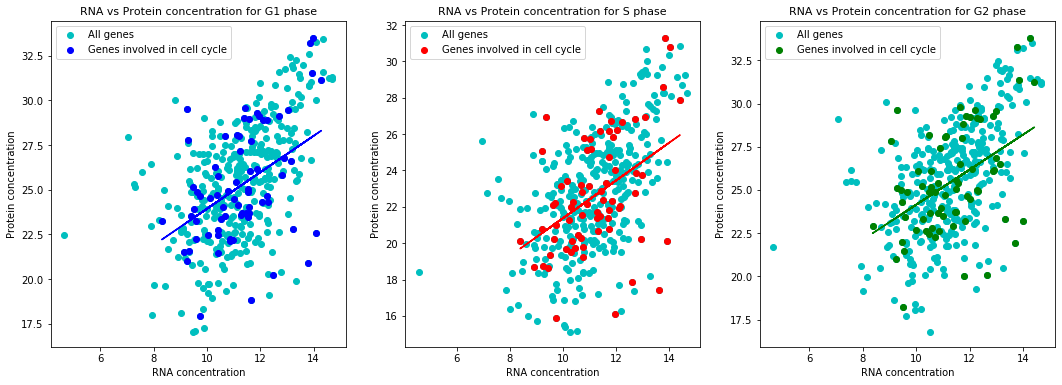

In [23]:
#week2
#1- scatter plot of RNA vs Protein for each stage of the cell cycle where only genes used in the cell cycle biological
#process are considered

df1_cellcycle = pd.DataFrame([]) #dataframe for genes with term cell cycle in GOBP
cellcycle = [] #array for temporarily storing extracted data

for i in range(len(df1)):
    a = df1['GOBP'][i].find('cell cycle')
    if(a!=-1): #a=-1 if phrase isnt found
        cellcycle.append(df1.loc[i, : ])

df1_cellcycle = df1_cellcycle.append(cellcycle)
df1_cellcycle = df1_cellcycle.reset_index(drop=True)

fig3, ax3 = plt.subplots(figsize=(18, 6),nrows=1, ncols=3)
ax3[0].set_title("RNA vs Protein concentration for G1 phase",fontsize = 11)
ax3[0].set_xlabel(xlabel="RNA concentration")
ax3[0].set_ylabel(ylabel="Protein concentration")
ax3[0].scatter(df1['mean_RNA_G1'], df1['mean_protein_G1'], c='c', label='All genes')
ax3[0].scatter(df1_cellcycle['mean_RNA_G1'], df1_cellcycle['mean_protein_G1'], 
               c='b', label='Genes involved in cell cycle')
ax3[0].legend()
ax3[1].set_title("RNA vs Protein concentration for S phase",fontsize = 11)
ax3[1].set_xlabel(xlabel="RNA concentration")
ax3[1].set_ylabel(ylabel="Protein concentration")
ax3[1].scatter(df1['mean_RNA_S'], df1['mean_protein_S'], c='c', label='All genes')
ax3[1].scatter(df1_cellcycle['mean_RNA_S'], df1_cellcycle['mean_protein_S'], c='r', 
               label='Genes involved in cell cycle')
ax3[1].legend()
ax3[2].set_title("RNA vs Protein concentration for G2 phase",fontsize = 11)
ax3[2].set_xlabel(xlabel="RNA concentration")
ax3[2].set_ylabel(ylabel="Protein concentration")
ax3[2].scatter(df1['mean_RNA_G2'], df1['mean_protein_G2'], c='c', label='All genes')
ax3[2].scatter(df1_cellcycle['mean_RNA_G2'], df1_cellcycle['mean_protein_G2'], c='g',
               label='Genes involved in cell cycle')
ax3[2].legend()

m_G1, b_G1, r_G1, p_G1, std_err_G1 = stats.linregress(df1_cellcycle['mean_RNA_G1'], df1_cellcycle['mean_protein_G1'])
m_S, b_S, r_S, p_S, std_err_S = stats.linregress(df1_cellcycle['mean_RNA_S'], df1_cellcycle['mean_protein_S'])
m_G2, b_G2, r_G2, p_G2, std_err_G2 = stats.linregress(df1_cellcycle['mean_RNA_G2'], df1_cellcycle['mean_protein_G2'])
ax3[0].plot(df1_cellcycle['mean_RNA_G1'], m_G1*df1_cellcycle['mean_RNA_G1'] + b_G1, 'b')
ax3[1].plot(df1_cellcycle['mean_RNA_S'], m_S*df1_cellcycle['mean_RNA_S'] + b_S, 'r')
ax3[2].plot(df1_cellcycle['mean_RNA_G2'], m_G2*df1_cellcycle['mean_RNA_G2'] + b_G2, 'g')

df1_cellcycle.corr(method='pearson') #pearson- std correlation coefficient
#the correlation between RNA and Protein at the different phases of the cell cycle is weaker than when all the data was
#used. This suggests genes involved in the cell cycle biological process arent the best genes for infering protein
#concentration from RNA

,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2
mean_RNA_G1,1.000000,0.997851,0.999540,0.840801,0.848882,0.852274
mean_RNA_S,0.997851,1.000000,0.996900,0.832572,0.844801,0.845251
mean_RNA_G2,0.999540,0.996900,1.000000,0.836108,0.844280,0.847706
mean_protein_G1,0.840801,0.832572,0.836108,1.000000,0.990856,0.998165
mean_protein_S,0.848882,0.844801,0.844280,0.990856,1.000000,0.990858
mean_protein_G2,0.852274,0.845251,0.847706,0.998165,0.990858,1.000000


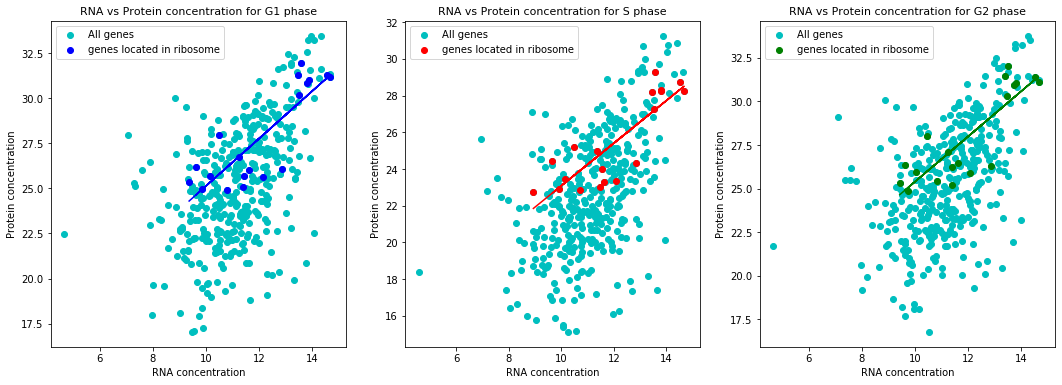

In [24]:
#2- scatter plot of RNA vs Protein for each stage of the cell cycle where only genes located in the ribosome of the cell
#are considered

df1_ribosome = pd.DataFrame([]) #dataframe for genes with term ribosome in GOCC
ribosome = [] #array for temporarily storing extracted data

for i in range(len(df1)):
    a = df1['GOCC'][i].find('ribosome')
    if(a!=-1): #a=-1 if phrase isnt found
        ribosome.append(df1.loc[i, : ])

df1_ribosome = df1_ribosome.append(ribosome)
df1_ribosome = df1_ribosome.reset_index(drop=True)

fig4, ax4 = plt.subplots(figsize=(18, 6),nrows=1, ncols=3)
ax4[0].set_title("RNA vs Protein concentration for G1 phase",fontsize = 11)
ax4[0].set_xlabel(xlabel="RNA concentration")
ax4[0].set_ylabel(ylabel="Protein concentration")
ax4[0].scatter(df1['mean_RNA_G1'], df1['mean_protein_G1'], c='c', label='All genes')
ax4[0].scatter(df1_ribosome['mean_RNA_G1'], df1_ribosome['mean_protein_G1'], c='b', label='genes located in ribosome')
ax4[0].legend()
ax4[1].set_title("RNA vs Protein concentration for S phase",fontsize = 11)
ax4[1].set_xlabel(xlabel="RNA concentration")
ax4[1].set_ylabel(ylabel="Protein concentration")
ax4[1].scatter(df1['mean_RNA_S'], df1['mean_protein_S'], c='c', label='All genes')
ax4[1].scatter(df1_ribosome['mean_RNA_S'], df1_ribosome['mean_protein_S'], c='r', label='genes located in ribosome')
ax4[1].legend()
ax4[2].set_title("RNA vs Protein concentration for G2 phase",fontsize = 11)
ax4[2].set_xlabel(xlabel="RNA concentration")
ax4[2].set_ylabel(ylabel="Protein concentration")
ax4[2].scatter(df1['mean_RNA_G2'], df1['mean_protein_G2'], c='c', label='All genes')
ax4[2].scatter(df1_ribosome['mean_RNA_G2'], df1_ribosome['mean_protein_G2'], c='g', label='genes located in ribosome')
ax4[2].legend()

m_G1, b_G1, r_G1, p_G1, std_err_G1 = stats.linregress(df1_ribosome['mean_RNA_G1'], df1_ribosome['mean_protein_G1'])
m_S, b_S, r_S, p_S, std_err_S = stats.linregress(df1_ribosome['mean_RNA_S'], df1_ribosome['mean_protein_S'])
m_G2, b_G2, r_G2, p_G2, std_err_G2 = stats.linregress(df1_ribosome['mean_RNA_G2'], df1_ribosome['mean_protein_G2'])
ax4[0].plot(df1_ribosome['mean_RNA_G1'], m_G1*df1_ribosome['mean_RNA_G1'] + b_G1, 'b')
ax4[1].plot(df1_ribosome['mean_RNA_S'], m_S*df1_ribosome['mean_RNA_S'] + b_S, 'r')
ax4[2].plot(df1_ribosome['mean_RNA_G2'], m_G2*df1_ribosome['mean_RNA_G2'] + b_G2, 'g')

df1_ribosome.corr(method='pearson') #pearson- std correlation coefficient
#the correlation between RNA and Protein concentration is stronger in the ribosome than when all the data was
#used. This suggests using genes located in the ribosome is a good indicator for infering protein concentration
#from RNA which makes sense since this is where the proteins are generated from the RNA- however the number of samples
#is much smaller so these results arent as reliable as the results from the full data set

In [25]:
#3- Count the number of occurrences of every GOBP term across all genes
print(df1.GOBP.str.split(';',expand=True).stack().value_counts())

#what are some of the difficulties that arise when using these terms?
#The processes which have occurred more frequently provide a more reliable representation of the relationship between 
#rna and protein concentration

cellular process                                                                                     377
metabolic process                                                                                    273
cellular metabolic process                                                                           260
primary metabolic process                                                                            255
biological regulation                                                                                236
regulation of biological process                                                                     225
regulation of cellular process                                                                       211
macromolecule metabolic process                                                                      211
cellular macromolecule metabolic process                                                             201
nitrogen compound metabolic process                    

In [26]:
#4- Calculate the change in mRNA/protein level across the cell cycle by taking the difference at each stage
# (G1-S, S-G2, G2-G1), and standardize the differences by mean-centering and variance scaling

#adding difference columns to data frame 1
df1['mean_RNA_g1s'] = (df1.mean_RNA_S - df1.mean_RNA_G1)
df1['mean_RNA_sg2'] = (df1.mean_RNA_G2 - df1.mean_RNA_S)
df1['mean_RNA_g2g1'] = (df1.mean_RNA_G1 - df1.mean_RNA_G2)
df1['mean_protein_g1s'] = (df1.mean_protein_S - df1.mean_protein_G1)
df1['mean_protein_sg2'] = (df1.mean_protein_G2 - df1.mean_protein_S)
df1['mean_protein_g2g1'] = (df1.mean_protein_G1 - df1.mean_protein_G2)

# standardising data frame 1: (x - x_bar)/std.dev
df1.iloc[:,-6:] = (df1.iloc[:,-6:] - df1.iloc[:,-6:].mean(axis=0)) / df1.iloc[:,-6:].std(axis=0)

protein concentration related to  STMN1 has changed by  -2.1620867879811585 betweeen G1 and S
protein concentration related to  KIFC1 has changed by  2.012848380413058 betweeen G1 and S
protein concentration related to  TUBB has changed by  -1.7037376035786416 betweeen G1 and S
protein concentration related to  CDCA1 has changed by  -1.761455220074481 betweeen G1 and S
protein concentration related to  H3F3A has changed by  1.538640708003829 betweeen G1 and S
protein concentration related to  CTNNB1 has changed by  -2.1964757992717527 betweeen G1 and S
protein concentration related to  SUPT5H has changed by  1.9470567502005398 betweeen G1 and S
protein concentration related to  MSH2 has changed by  1.53663874968469 betweeen G1 and S


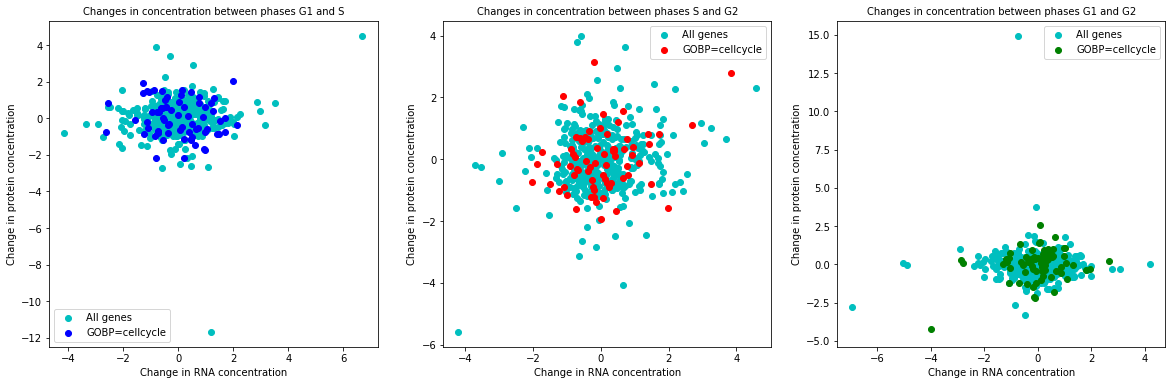

In [52]:
#adding difference columns to data frame 1 cellcycle
df1_cellcycle['mean_RNA_g1s'] = (df1_cellcycle.mean_RNA_S - df1_cellcycle.mean_RNA_G1)
df1_cellcycle['mean_RNA_sg2'] = (df1_cellcycle.mean_RNA_G2 - df1_cellcycle.mean_RNA_S)
df1_cellcycle['mean_RNA_g2g1'] = (df1_cellcycle.mean_RNA_G1 - df1_cellcycle.mean_RNA_G2)
df1_cellcycle['mean_protein_g1s'] = (df1_cellcycle.mean_protein_S - df1_cellcycle.mean_protein_G1)
df1_cellcycle['mean_protein_sg2'] = (df1_cellcycle.mean_protein_G2 - df1_cellcycle.mean_protein_S)
df1_cellcycle['mean_protein_g2g1'] = (df1_cellcycle.mean_protein_G1 - df1_cellcycle.mean_protein_G2)

# standardise: (x - x_bar)/std.dev
df1_cellcycle.iloc[:,-6:] = (df1_cellcycle.iloc[:,-6:] - df1_cellcycle.iloc[:,-6:].mean(axis=0)) / df1_cellcycle.iloc[:,-6:].std(axis=0)

fig5, ax5 = plt.subplots(figsize=(20, 6), nrows=1, ncols=3)
ax5[0].set_title("Changes in concentration between phases G1 and S",fontsize = 10)
ax5[0].set_xlabel(xlabel="Change in RNA concentration")
ax5[0].set_ylabel(ylabel="Change in protein concentration")
ax5[0].scatter(df1['mean_RNA_g1s'], df1['mean_protein_g1s'], c='c', label='All genes')
ax5[0].scatter(df1_cellcycle['mean_RNA_g1s'], df1_cellcycle['mean_protein_g1s'], c='b', label='GOBP=cellcycle')
ax5[0].legend()
ax5[1].set_title("Changes in concentration between phases S and G2",fontsize = 10)
ax5[1].set_xlabel(xlabel="Change in RNA concentration")
ax5[1].set_ylabel(ylabel="Change in protein concentration")
ax5[1].scatter(df1['mean_RNA_sg2'], df1['mean_protein_sg2'], c='c', label='All genes')
ax5[1].scatter(df1_cellcycle['mean_RNA_sg2'], df1_cellcycle['mean_protein_sg2'], c='r', label='GOBP=cellcycle')
ax5[1].legend()
ax5[2].set_title("Changes in concentration between phases G1 and G2",fontsize = 10)
ax5[2].set_xlabel(xlabel="Change in RNA concentration")
ax5[2].set_ylabel(ylabel="Change in protein concentration")
ax5[2].scatter(df1['mean_RNA_g2g1'], df1['mean_protein_g2g1'], c='c', label='All genes')
ax5[2].scatter(df1_cellcycle['mean_RNA_g2g1'], df1_cellcycle['mean_protein_g2g1'], c='g', label='GOBP=cellcycle')
ax5[2].legend()

for i in range(len(df1_cellcycle)):
    if(df1_cellcycle['mean_protein_g1s'][i]>1.5 or df1_cellcycle['mean_protein_g1s'][i]<-1.5):
        print("protein concentration related to ", df1_cellcycle['Gene_Name'][i], "has changed by ",
             df1_cellcycle['mean_protein_g1s'][i], "betweeen G1 and S")

protein concentration related to  MRPS16 has changed by  1.5129980799239606 betweeen G1 and S
protein concentration related to  RPS4X has changed by  -1.5596875619938797 betweeen G1 and S


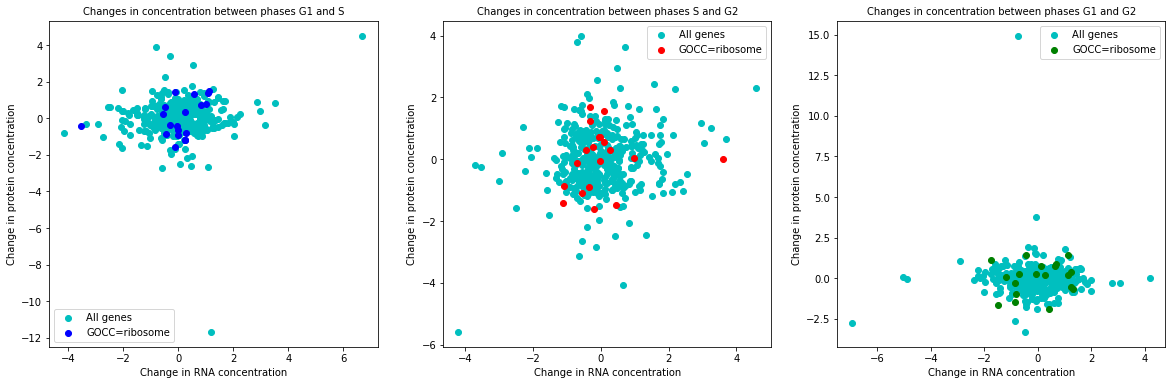

In [51]:
#adding difference columns to data frame 1 ribosome
df1_ribosome['mean_RNA_g1s'] = (df1_ribosome.mean_RNA_S - df1_ribosome.mean_RNA_G1)
df1_ribosome['mean_RNA_sg2'] = (df1_ribosome.mean_RNA_G2 - df1_ribosome.mean_RNA_S)
df1_ribosome['mean_RNA_g2g1'] = (df1_ribosome.mean_RNA_G1 - df1_ribosome.mean_RNA_G2)
df1_ribosome['mean_protein_g1s'] = (df1_ribosome.mean_protein_S - df1_ribosome.mean_protein_G1)
df1_ribosome['mean_protein_sg2'] = (df1_ribosome.mean_protein_G2 - df1_ribosome.mean_protein_S)
df1_ribosome['mean_protein_g2g1'] = (df1_ribosome.mean_protein_G1 - df1_ribosome.mean_protein_G2)

# standardise: (x - x_bar)/std.dev
df1_ribosome.iloc[:,-6:] = (df1_ribosome.iloc[:,-6:] - df1_ribosome.iloc[:,-6:].mean(axis=0)) / df1_ribosome.iloc[:,-6:].std(axis=0)

fig6, ax6 = plt.subplots(figsize=(20, 6),nrows=1, ncols=3)
ax6[0].set_title("Changes in concentration between phases G1 and S",fontsize = 10)
ax6[0].set_xlabel(xlabel="Change in RNA concentration")
ax6[0].set_ylabel(ylabel="Change in protein concentration")
ax6[0].scatter(df1['mean_RNA_g1s'], df1['mean_protein_g1s'], c='c', label='All genes')
ax6[0].scatter(df1_ribosome['mean_RNA_g1s'], df1_ribosome['mean_protein_g1s'], c='b', label='GOCC=ribosome')
ax6[0].legend()

ax6[1].set_title("Changes in concentration between phases S and G2",fontsize = 10)
ax6[1].set_xlabel(xlabel="Change in RNA concentration")
ax6[1].set_ylabel(ylabel="Change in protein concentration")
ax6[1].scatter(df1['mean_RNA_sg2'], df1['mean_protein_sg2'], c='c', label='All genes')
ax6[1].scatter(df1_ribosome['mean_RNA_sg2'], df1_ribosome['mean_protein_sg2'], c='r', label='GOCC=ribosome')
ax6[1].legend()

ax6[2].set_title("Changes in concentration between phases G1 and G2",fontsize = 10)
ax6[2].set_xlabel(xlabel="Change in RNA concentration")
ax6[2].set_ylabel(ylabel="Change in protein concentration")
ax6[2].scatter(df1['mean_RNA_g2g1'], df1['mean_protein_g2g1'], c='c', label='All genes')
ax6[2].scatter(df1_ribosome['mean_RNA_g2g1'], df1_ribosome['mean_protein_g2g1'], c='g', label='GOCC=ribosome')
ax6[2].legend()

#the change in rna and protein concentrations between the stages are centered about zero for the genes involved in
#the cell cycle process- this suggests the function of proteins related to the genes in the ribosome are active across all
#phases

for i in range(len(df1_ribosome)):
    if(df1_ribosome['mean_protein_g1s'][i]>1.5 or df1_ribosome['mean_protein_g1s'][i]<-1.5):
        print("protein concentration related to ", df1_ribosome['Gene_Name'][i], "has changed by ",
             df1_ribosome['mean_protein_g1s'][i], "betweeen G1 and S")

protein concentration related to  TAPBP has changed by  1.515048047201052 betweeen G1 and S
protein concentration related to  HDAC6 has changed by  -2.191278064536201 betweeen G1 and S
protein concentration related to  DTNBP1 has changed by  -1.8700448869549124 betweeen G1 and S
protein concentration related to  ATP6AP1 has changed by  2.0523946362975076 betweeen G1 and S
protein concentration related to  GSK3A has changed by  -1.7167625492146086 betweeen G1 and S
protein concentration related to  STX12 has changed by  1.892466392747216 betweeen G1 and S
protein concentration related to  SMG7 has changed by  -1.8163161667101315 betweeen G1 and S
protein concentration related to  TIMM23 has changed by  1.838883439729782 betweeen G1 and S
protein concentration related to  SOAT1 has changed by  2.033115570783666 betweeen G1 and S
protein concentration related to  SCARB1 has changed by  1.940942094021182 betweeen G1 and S
protein concentration related to  RABEP2 has changed by  -2.54861832

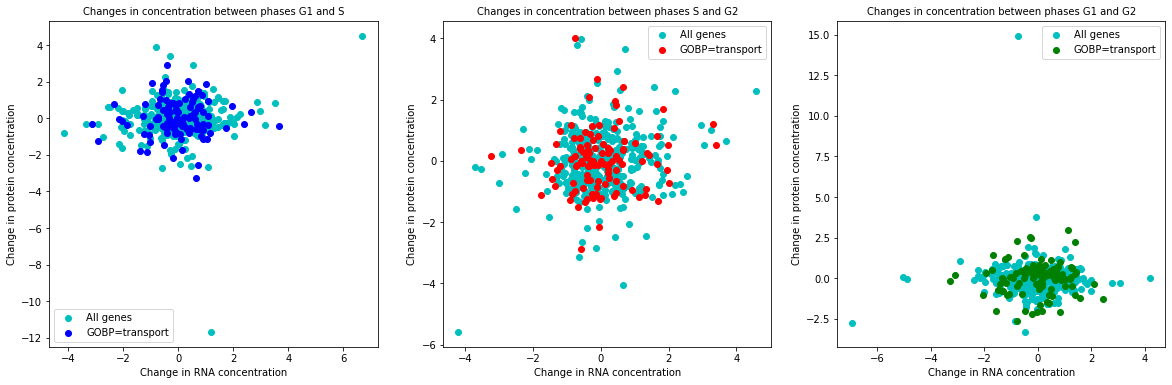

In [53]:
df1_transport = pd.DataFrame([]) #dataframe for genes with term cell cycle in GOBP
transport = [] #array for temporarily storing extracted data

for i in range(len(df1)):
    a = df1['GOBP'][i].find('transport')
    if(a!=-1): #a=-1 if phrase isnt found
        transport.append(df1.loc[i, : ])

df1_transport = df1_transport.append(transport)
df1_transport = df1_transport.reset_index(drop=True)

#adding difference columns to data frame 1 ribosome
df1_transport['mean_RNA_g1s'] = (df1_transport.mean_RNA_S - df1_transport.mean_RNA_G1)
df1_transport['mean_RNA_sg2'] = (df1_transport.mean_RNA_G2 - df1_transport.mean_RNA_S)
df1_transport['mean_RNA_g2g1'] = (df1_transport.mean_RNA_G1 - df1_transport.mean_RNA_G2)
df1_transport['mean_protein_g1s'] = (df1_transport.mean_protein_S - df1_transport.mean_protein_G1)
df1_transport['mean_protein_sg2'] = (df1_transport.mean_protein_G2 - df1_transport.mean_protein_S)
df1_transport['mean_protein_g2g1'] = (df1_transport.mean_protein_G1 - df1_transport.mean_protein_G2)

# standardise: (x - x_bar)/std.dev
df1_transport.iloc[:,-6:] = (df1_transport.iloc[:,-6:] - df1_transport.iloc[:,-6:].mean(axis=0)) / df1_transport.iloc[:,-6:].std(axis=0)

fig7, ax7 = plt.subplots(figsize=(20, 6),nrows=1, ncols=3)
ax7[0].set_title("Changes in concentration between phases G1 and S",fontsize = 10)
ax7[0].set_xlabel(xlabel="Change in RNA concentration")
ax7[0].set_ylabel(ylabel="Change in protein concentration")
ax7[0].scatter(df1['mean_RNA_g1s'], df1['mean_protein_g1s'], c='c', label='All genes')
ax7[0].scatter(df1_transport['mean_RNA_g1s'], df1_transport['mean_protein_g1s'], c='b', label='GOBP=transport')
ax7[0].legend()

ax7[1].set_title("Changes in concentration between phases S and G2",fontsize = 10)
ax7[1].set_xlabel(xlabel="Change in RNA concentration")
ax7[1].set_ylabel(ylabel="Change in protein concentration")
ax7[1].scatter(df1['mean_RNA_sg2'], df1['mean_protein_sg2'], c='c', label='All genes')
ax7[1].scatter(df1_transport['mean_RNA_sg2'], df1_transport['mean_protein_sg2'], c='r', label='GOBP=transport')
ax7[1].legend()

ax7[2].set_title("Changes in concentration between phases G1 and G2",fontsize = 10)
ax7[2].set_xlabel(xlabel="Change in RNA concentration")
ax7[2].set_ylabel(ylabel="Change in protein concentration")
ax7[2].scatter(df1['mean_RNA_g2g1'], df1['mean_protein_g2g1'], c='c', label='All genes')
ax7[2].scatter(df1_transport['mean_RNA_g2g1'], df1_transport['mean_protein_g2g1'], c='g', label='GOBP=transport')
ax7[2].legend()

#expected to see a significant change between the changes in concentration of G1-S and S-G2 since i didnt imagine much
#transportation occurring during the S phase

for i in range(len(df1_transport)):
    if(df1_transport['mean_protein_g1s'][i]>1.5 or df1_transport['mean_protein_g1s'][i]<-1.5):
        print("protein concentration related to ", df1_transport['Gene_Name'][i], "has changed by ",
             df1_transport['mean_protein_g1s'][i], "betweeen G1 and S")

protein concentration related to  SACS has changed by  -8.769448667372123 betweeen G1 and S
protein concentration related to  MAN1B1 has changed by  2.2744531578757274 betweeen G1 and S
protein concentration related to  CYR61 has changed by  3.502026130366919 betweeen G1 and S
protein concentration related to  GLMN has changed by  -1.8830071323152693 betweeen G1 and S


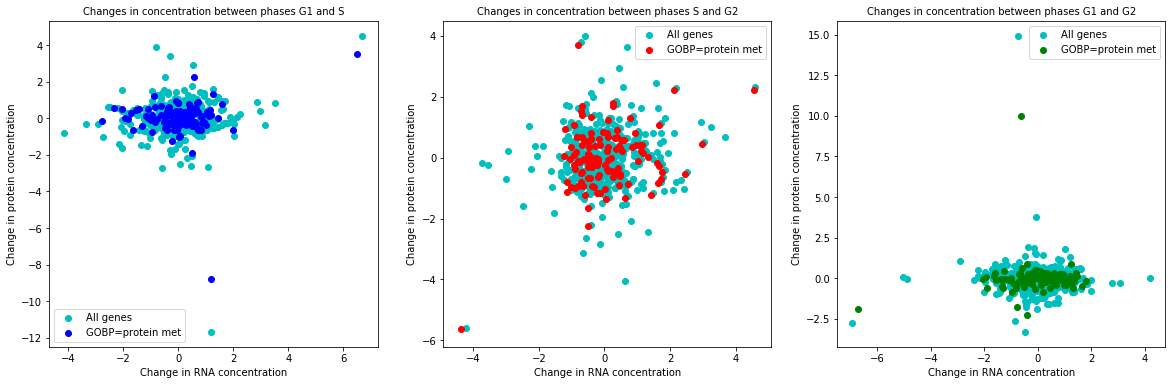

In [54]:
df1_proteinmet = pd.DataFrame([]) #dataframe for genes with term cell cycle in GOBP
proteinmet = [] #array for temporarily storing extracted data

for i in range(len(df1)):
    a = df1['GOBP'][i].find('protein metabolic process')
    if(a!=-1): #a=-1 if phrase isnt found
        proteinmet.append(df1.loc[i, : ])

df1_proteinmet = df1_proteinmet.append(proteinmet)
df1_proteinmet = df1_proteinmet.reset_index(drop=True)

#adding difference columns to data frame 1 ribosome
df1_proteinmet['mean_RNA_g1s'] = (df1_proteinmet.mean_RNA_S - df1_proteinmet.mean_RNA_G1)
df1_proteinmet['mean_RNA_sg2'] = (df1_proteinmet.mean_RNA_G2 - df1_proteinmet.mean_RNA_S)
df1_proteinmet['mean_RNA_g2g1'] = (df1_proteinmet.mean_RNA_G1 - df1_proteinmet.mean_RNA_G2)
df1_proteinmet['mean_protein_g1s'] = (df1_proteinmet.mean_protein_S - df1_proteinmet.mean_protein_G1)
df1_proteinmet['mean_protein_sg2'] = (df1_proteinmet.mean_protein_G2 - df1_proteinmet.mean_protein_S)
df1_proteinmet['mean_protein_g2g1'] = (df1_proteinmet.mean_protein_G1 - df1_proteinmet.mean_protein_G2)

# standardise: (x - x_bar)/std.dev
df1_proteinmet.iloc[:,-6:] = (df1_proteinmet.iloc[:,-6:] - df1_proteinmet.iloc[:,-6:].mean(axis=0)) / df1_proteinmet.iloc[:,-6:].std(axis=0)

fig8, ax8 = plt.subplots(figsize=(20, 6),nrows=1, ncols=3)
ax8[0].set_title("Changes in concentration between phases G1 and S",fontsize = 10)
ax8[0].set_xlabel(xlabel="Change in RNA concentration")
ax8[0].set_ylabel(ylabel="Change in protein concentration")
ax8[0].scatter(df1['mean_RNA_g1s'], df1['mean_protein_g1s'], c='c', label='All genes')
ax8[0].scatter(df1_proteinmet['mean_RNA_g1s'], df1_proteinmet['mean_protein_g1s'], c='b', label='GOBP=protein met')
ax8[0].legend()

ax8[1].set_title("Changes in concentration between phases S and G2",fontsize = 10)
ax8[1].set_xlabel(xlabel="Change in RNA concentration")
ax8[1].set_ylabel(ylabel="Change in protein concentration")
ax8[1].scatter(df1['mean_RNA_sg2'], df1['mean_protein_sg2'], c='c', label='All genes')
ax8[1].scatter(df1_proteinmet['mean_RNA_sg2'], df1_proteinmet['mean_protein_sg2'], c='r', label='GOBP=protein met')
ax8[1].legend()

ax8[2].set_title("Changes in concentration between phases G1 and G2",fontsize = 10)
ax8[2].set_xlabel(xlabel="Change in RNA concentration")
ax8[2].set_ylabel(ylabel="Change in protein concentration")
ax8[2].scatter(df1['mean_RNA_g2g1'], df1['mean_protein_g2g1'], c='c', label='All genes')
ax8[2].scatter(df1_proteinmet['mean_RNA_g2g1'], df1_proteinmet['mean_protein_g2g1'], c='g', label='GOBP=protein met')
ax8[2].legend()

#the change in rna and protein concentrations between the stages are centered about zero for the genes involved in
#the cell cycle process- this suggests the function of proteins related to the genes in the ribosome are active across all
#phases

for i in range(len(df1_proteinmet)):
    if(df1_proteinmet['mean_protein_g1s'][i]>1.5 or df1_proteinmet['mean_protein_g1s'][i]<-1.5):
        print("protein concentration related to ", df1_proteinmet['Gene_Name'][i], "has changed by ",
             df1_proteinmet['mean_protein_g1s'][i], "betweeen G1 and S")

protein concentration related to  HDAC6 has changed by  -1.9288305018230172 betweeen G1 and S


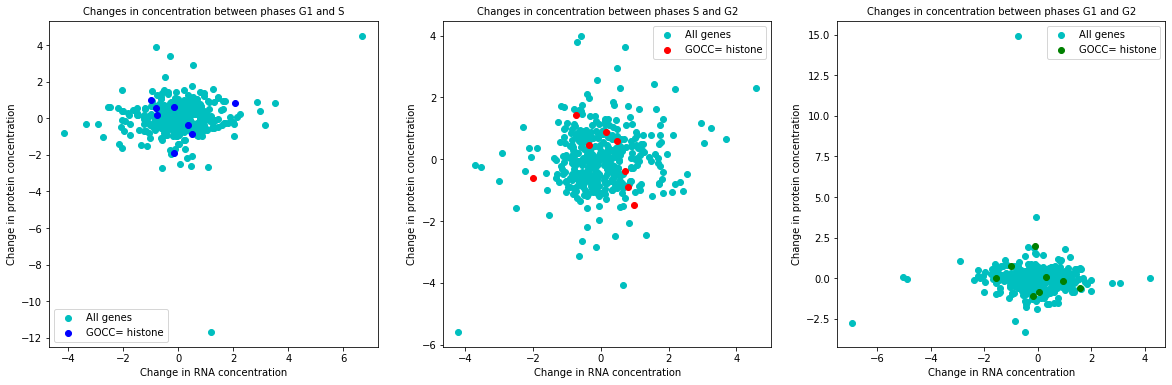

In [55]:
df1_histone = pd.DataFrame([]) #dataframe for genes with term ribosome in GOCC
histone = [] #array for temporarily storing extracted data

for i in range(len(df1)):
    a = df1['GOCC'][i].find('histone')
    if(a!=-1): #a=-1 if phrase isnt found
        histone.append(df1.loc[i, : ])

df1_histone = df1_histone.append(histone)
df1_histone = df1_histone.reset_index(drop=True)

#adding difference columns to data frame 1 ribosome
df1_histone['mean_RNA_g1s'] = (df1_histone.mean_RNA_S - df1_histone.mean_RNA_G1)
df1_histone['mean_RNA_sg2'] = (df1_histone.mean_RNA_G2 - df1_histone.mean_RNA_S)
df1_histone['mean_RNA_g2g1'] = (df1_histone.mean_RNA_G1 - df1_histone.mean_RNA_G2)
df1_histone['mean_protein_g1s'] = (df1_histone.mean_protein_S - df1_histone.mean_protein_G1)
df1_histone['mean_protein_sg2'] = (df1_histone.mean_protein_G2 - df1_histone.mean_protein_S)
df1_histone['mean_protein_g2g1'] = (df1_histone.mean_protein_G1 - df1_histone.mean_protein_G2)

# standardise: (x - x_bar)/std.dev
df1_histone.iloc[:,-6:] = (df1_histone.iloc[:,-6:] - df1_histone.iloc[:,-6:].mean(axis=0)) / df1_histone.iloc[:,-6:].std(axis=0)

fig9, ax9 = plt.subplots(figsize=(20, 6),nrows=1, ncols=3)
ax9[0].set_title("Changes in concentration between phases G1 and S",fontsize = 10)
ax9[0].set_xlabel(xlabel="Change in RNA concentration")
ax9[0].set_ylabel(ylabel="Change in protein concentration")
ax9[0].scatter(df1['mean_RNA_g1s'], df1['mean_protein_g1s'], c='c', label='All genes')
ax9[0].scatter(df1_histone['mean_RNA_g1s'], df1_histone['mean_protein_g1s'], c='b', label='GOCC= histone')
ax9[0].legend()

ax9[1].set_title("Changes in concentration between phases S and G2",fontsize = 10)
ax9[1].set_xlabel(xlabel="Change in RNA concentration")
ax9[1].set_ylabel(ylabel="Change in protein concentration")
ax9[1].scatter(df1['mean_RNA_sg2'], df1['mean_protein_sg2'], c='c', label='All genes')
ax9[1].scatter(df1_histone['mean_RNA_sg2'], df1_histone['mean_protein_sg2'], c='r', label='GOCC= histone')
ax9[1].legend()

ax9[2].set_title("Changes in concentration between phases G1 and G2",fontsize = 10)
ax9[2].set_xlabel(xlabel="Change in RNA concentration")
ax9[2].set_ylabel(ylabel="Change in protein concentration")
ax9[2].scatter(df1['mean_RNA_g2g1'], df1['mean_protein_g2g1'], c='c', label='All genes')
ax9[2].scatter(df1_histone['mean_RNA_g2g1'], df1_histone['mean_protein_g2g1'], c='g', label='GOCC= histone')
ax9[2].legend()

#Rates of RNA transcription and protein synthesis are very low during this phase. An exception to this is histone
#production, most of which occurs during the S phase

for i in range(len(df1_histone)):
    if(df1_histone['mean_protein_g1s'][i]>1.5 or df1_histone['mean_protein_g1s'][i]<-1.5):
        print("protein concentration related to ", df1_histone['Gene_Name'][i], "has changed by ",
             df1_histone['mean_protein_g1s'][i], "betweeen G1 and S")